In [1]:
from drt_solver.device import DRT, Measurement
from drt_solver.simulaton import Simulation
import jax.numpy as jnp 
import pandas as pd

from fitting.optimizer import Optimizer
import matplotlib.pyplot as plt

from drt_solver_old.database import (ZARC, 
                                 gamma_ZARC)

In [2]:
columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("/Users/tara/Downloads/1_15ml_100mM_DHPS_10_PEIS_C01_EIS_data.csv", header=None, names=columns)

f = jnp.array(df["f"].values)

tau = 1./(2*jnp.pi*f)
tau = jnp.flip(jnp.logspace(-8, 8, 500))

Z_exact_re =  jnp.array(df["Z_re"].values)
Z_exact_im =  jnp.array(df["Z_im"].values)

# Create our measurement object
measurement = Measurement(Z_exact_re, Z_exact_im, f)

First we upload our fake dataset that we wish to fit to

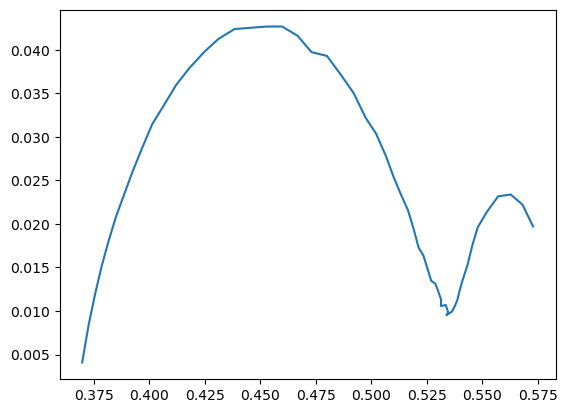

In [3]:
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

Next we create our initial guess for the DRT - here we assume a Guassian profile 

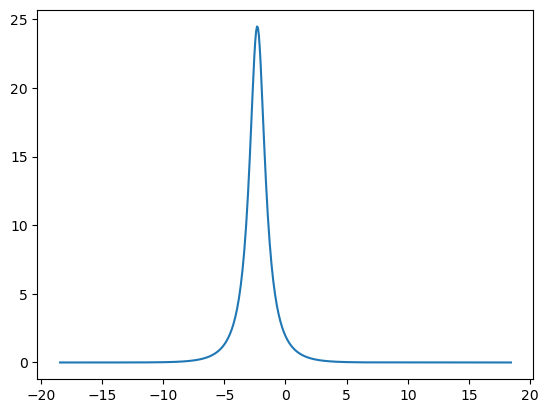

In [4]:
gamma_guess = gamma_ZARC(tau, R_ct=50, tau_0=.1, phi= .8)
plt.plot(jnp.log(tau), gamma_guess)

In [5]:
drt = DRT(R_inf= 10, L_0=0, gamma=gamma_guess, tau=tau)

In [6]:
simulation = Simulation(drt=drt, f_vec=f, integration_method='rbf')
simulation2 = Simulation(drt=drt, f_vec=f, integration_method='trapezoid')

In [7]:
def normalize_array(arr: jnp.ndarray) -> jnp.ndarray:
    """
    Normalizes the input array so that its values lie between 0 and 1.

    Parameters:
    arr (jnp.ndarray): Input array to be normalized.

    Returns:
    jnp.ndarray: Normalized array with values between 0 and 1.
    """
    min_val = jnp.min(arr)
    max_val = jnp.max(arr)
    normalized = (arr - min_val) / (max_val - min_val)
    return normalized

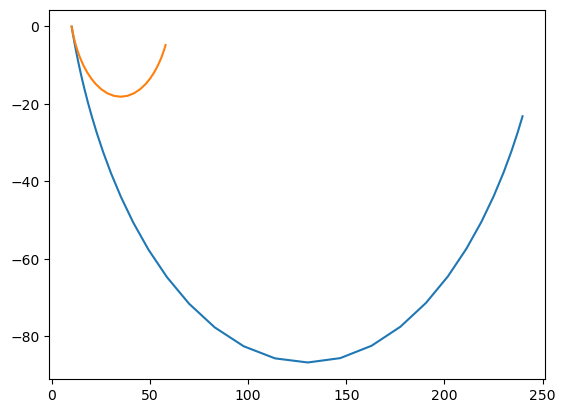

In [8]:
Z_re_fake, Z_im_fake = simulation.run()
Z_re_fake2, Z_im_fake2 = simulation2.run()


plt.plot((Z_re_fake), (Z_im_fake), )
plt.plot((Z_re_fake2), (Z_im_fake2), )
plt.show()

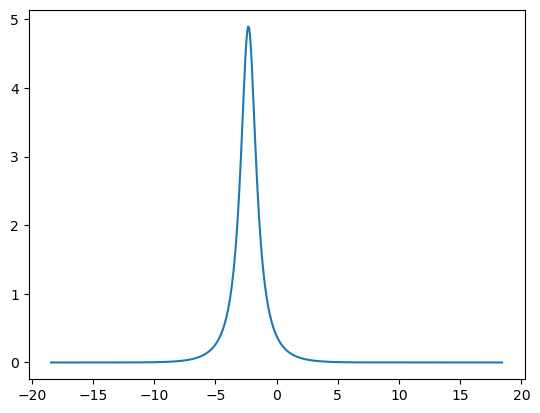

In [9]:
# Creating Fake Data
# measurement = Measurement(Z_re_fake, Z_im_fake, f)

gamma_guess2 = gamma_ZARC(tau,  R_ct=10, tau_0=.1, phi= .8)
plt.plot(jnp.log(tau), gamma_guess2)

drt_guess = DRT(R_inf=50, L_0=0, gamma=gamma_guess2, tau=tau)

In [ ]:


solver_dict = {'lambda': .08, 'maxiter': 10000}
optim = Optimizer(drt=drt_guess, measurement=measurement, solver="regression", solver_dict = solver_dict)
final_sim = optim.run()

KeyboardInterrupt: 

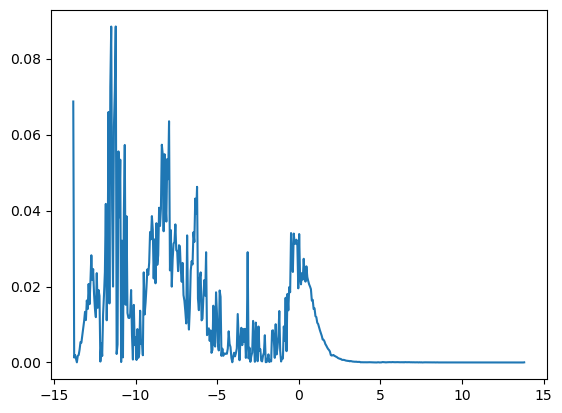

In [ ]:
drt_final = DRT(final_sim.R_inf, final_sim.L_0, final_sim.drt, final_sim.tau)

# Create simulation object with optimized values
simulation_final = Simulation(drt_final, f_vec=f)

plt.plot(jnp.log(final_sim.tau), final_sim.drt)
# plt.plot(jnp.log(final_sim.tau), gamma_guess2)
plt.show()


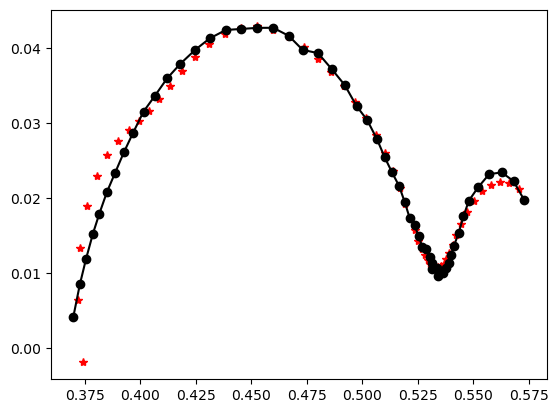

In [ ]:
Z_re, Z_im = simulation_final.run()

plt.plot(Z_re, -Z_im, 'r*')
plt.plot(Z_exact_re, -Z_exact_im, '-ko')
plt.show()